In [129]:
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

In [130]:
product = 'patata'
tipo = 'export'

In [131]:
os.chdir('/Volumes/Macintosh HD/_Drive/Journey-of-food/data/datacomex/'+product+'/'+tipo)
files = os.listdir()
files[1:-1]

['DataComex_170921120451.csv',
 'DataComex_170921120604.csv',
 'DataComex_170921121343.csv',
 'DataComex_170921130000.csv',
 'DataComex_170921131223.csv',
 'DataComex_170921131339.csv',
 'DataComex_170921131450.csv',
 'DataComex_170921131609.csv']

In [132]:
dataList = []
for file in files[1:-1]:
    data = pd.read_csv(file, delimiter=',', decimal=',', parse_dates=['subfila'])
    dataList.append(data)


In [133]:
data = pd.concat(dataList)
data = data.fillna(0)
data['tipo'] = tipo

In [134]:
data.head()

,fila,subfila,columna,subcolumna,valor,tipo
0,"0541 PATATAS, FRESCAS O REFRIGERADA",Total seleccionado,001 Francia,Total modo transporte,4037560.05,export
1,"0541 PATATAS, FRESCAS O REFRIGERADA",Junio de 2017,001 Francia,Total modo transporte,1037401.54,export
2,"0541 PATATAS, FRESCAS O REFRIGERADA",Mayo de 2017,001 Francia,Total modo transporte,1839330.35,export
3,"0541 PATATAS, FRESCAS O REFRIGERADA",Abril de 2017,001 Francia,Total modo transporte,1160828.16,export
4,"0541 PATATAS, FRESCAS O REFRIGERADA",Total seleccionado,001 Francia,3 Carretera,4035560.05,export


In [135]:
dataTotalSubfila = data.loc[data.subfila=='Total seleccionado']
dataTotalColumna = data.loc[data.columna=='Total Mundo']
dataTotalSubcolumna = data.loc[data.subcolumna=='Total modo transporte']

data = data[data.subfila!='Total seleccionado']
data = data[data.columna!='Total Mundo']
data = data[data.subcolumna!='Total modo transporte'] 

In [136]:
countryList=[]

for country in data.columna.values.tolist():
    countryList.append(country.replace(' (d.01/01/86)', ''))
data.columna = countryList

countryList=[]
for country in data.columna.values.tolist():   
    countryList.append(country.replace(' (d.01/01/99)', ''))
data.columna = countryList
                       
countryList=[]
for country in data.columna.values.tolist():    
    countryList.append(country.replace(' (d.01/01/99)', ''))
data.columna = countryList
                       
countryList=[]
for country in data.columna.values.tolist():    
    countryList.append(country.replace(' (d.01/01/95)', ''))
data.columna = countryList

countryList=[]
for country in data.columna.values.tolist():    
    countryList.append(country.replace(' (d.01/01/92)', ''))
data.columna = countryList

countryList=[]
for country in data.columna.values.tolist():    
    countryList.append(country.replace(' (d.01/06/05)', ''))
data.columna = countryList

countryList=[]
for country in data.columna.values.tolist():    
    countryList.append(country.replace(' (d.01/01/93)', ''))
data.columna = countryList

data.columna.values.tolist() 

['001 Francia',
 '001 Francia',
 '001 Francia',
 '001 Francia',
 '001 Francia',
 '001 Francia',
 '003 Países Bajos',
 '003 Países Bajos',
 '003 Países Bajos',
 '003 Países Bajos',
 '003 Países Bajos',
 '003 Países Bajos',
 '004 Alemania',
 '004 Alemania',
 '004 Alemania',
 '004 Alemania',
 '004 Alemania',
 '004 Alemania',
 '005 Italia',
 '005 Italia',
 '005 Italia',
 '006 Reino Unido',
 '006 Reino Unido',
 '006 Reino Unido',
 '006 Reino Unido',
 '006 Reino Unido',
 '006 Reino Unido',
 '007 Irlanda',
 '007 Irlanda',
 '007 Irlanda',
 '007 Irlanda',
 '007 Irlanda',
 '007 Irlanda',
 '008 Dinamarca',
 '008 Dinamarca',
 '008 Dinamarca',
 '008 Dinamarca',
 '008 Dinamarca',
 '008 Dinamarca',
 '009 Grecia',
 '009 Grecia',
 '009 Grecia',
 '010 Portugal',
 '010 Portugal',
 '010 Portugal',
 '017 Bélgica',
 '017 Bélgica',
 '017 Bélgica',
 '028 Noruega',
 '028 Noruega',
 '028 Noruega',
 '030 Suecia',
 '030 Suecia',
 '030 Suecia',
 '032 Finlandia',
 '032 Finlandia',
 '032 Finlandia',
 '032 Finlandia'

In [137]:
data.columna = data.columna.astype('category')
data.subcolumna = data.subcolumna.astype('category')

In [138]:
data.head()

,fila,subfila,columna,subcolumna,valor,tipo
5,"0541 PATATAS, FRESCAS O REFRIGERADA",Junio de 2017,001 Francia,3 Carretera,1037401.54,export
6,"0541 PATATAS, FRESCAS O REFRIGERADA",Mayo de 2017,001 Francia,3 Carretera,1837330.35,export
7,"0541 PATATAS, FRESCAS O REFRIGERADA",Abril de 2017,001 Francia,3 Carretera,1160828.16,export
9,"0541 PATATAS, FRESCAS O REFRIGERADA",Junio de 2017,001 Francia,5 Tráfico postal,0.00,export
10,"0541 PATATAS, FRESCAS O REFRIGERADA",Mayo de 2017,001 Francia,5 Tráfico postal,2000.00,export


In [139]:
data.columna = data.columna.apply(lambda x: x.__str__()[3:])
data.subcolumna = data.subcolumna.apply(lambda x: x.__str__()[2:])

In [140]:
import locale
import time
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

In [141]:
data.subfila
data.subfila = data.subfila.apply(lambda x: time.strptime(x.__str__(), "%B de %Y"))
data.subfila = data.subfila.apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', x))

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 5 to 685
Data columns (total 6 columns):
fila          2205 non-null object
subfila       2205 non-null object
columna       2205 non-null category
subcolumna    2205 non-null category
valor         2205 non-null float64
tipo          2205 non-null object
dtypes: category(2), float64(1), object(3)
memory usage: 93.8+ KB


In [143]:
data.columns = ['producto', 'fecha', 'pais', 'transporte', 'kg', 'tipo']

In [144]:
data.to_csv('patata_'+tipo+'_clean.csv', encoding='latin1')

In [145]:
data = pd.read_csv('patata_'+tipo+'_clean.csv', encoding = 'latin1',parse_dates=['fecha'])

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 7 columns):
Unnamed: 0    2205 non-null int64
producto      2205 non-null object
fecha         2205 non-null datetime64[ns]
pais          2205 non-null object
transporte    2205 non-null object
kg            2205 non-null float64
tipo          2205 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 120.7+ KB


In [147]:
data.pais = data.pais.astype('category')
data.transporte = data.transporte.astype('category')
data.producto = data.producto.astype('category')

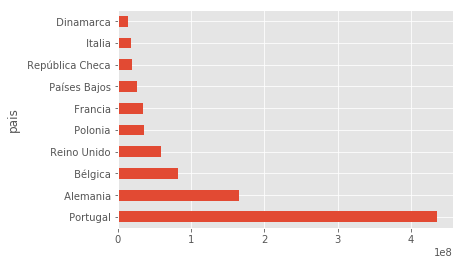

In [148]:
data.kg.groupby(data.pais).sum().sort_values(ascending=False).head(10).plot('barh')

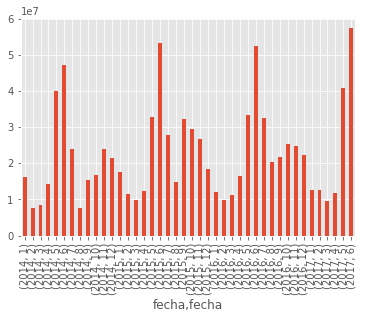

In [149]:
data.kg.groupby([data.fecha.dt.year,data.fecha.dt.month]).sum().plot('bar')

In [150]:
#from geopy.geocoders import Nominatim
#from mpl_toolkits.basemap import Basemap
#import matplotlib.cm as cm

In [127]:
#geolocator = Nominatim()
#location = geolocator.geocode("Spain")
#location[1][0]

In [128]:
#data['lat'] = data.index.tolist()
#data['lat'] = data.lat.apply(lambda x: geolocator.geocode(x)[1][0])
#data['lon'] = data.index
#data['lon'] = data.lat.apply(lambda x: geolocator.geocode(x)[1][1])
#data['geo'] = data.index
#data['geo'] = data.lat.apply(lambda x: geolocator.geocode(x))
#x = data.lon.values
#y = data.lat.values
#z = data.ACELGA.values
#map = Basemap()
#map.drawcoastlines(linewidth=0.5)
#map.scatter(x, y, marker='o',s = z)